In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from collections import defaultdict, Counter, OrderedDict
from operator import itemgetter

import codecs
import csv
import itertools

import spacy

%matplotlib
%matplotlib inline  

import seaborn as sns

f = '../data/raw/final_results.csv'

Using matplotlib backend: Qt5Agg


In [ ]:
confusion_matrix()

In [3]:
reg_ans = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
comb_ans = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 5, 7: 7, 8: 8}
def parse_results(f_name, ans_dic):
    results = {}
    table = pandas.read_csv(f_name)
    answers = defaultdict(dict)
    for ind, row in table.iterrows():
        worker = row['WorkerId']
        time_complete = row['WorkTimeInSeconds']
        task_id = row['Input.task_id']
        show_id = row['Input.show_id']
        scene_ind = row['Input.scene_index']
        text_ind = row['Input.text_index']
        text = row['Input.text_reduced']
        target = row['Input.target']
        target_ind_s = row['Input.target_start_index']
        target_ind_e = row['Input.target_end_index']
        ans = row['Answer.ans']
        comment = row['Answer.comment']
        ref_offset = row['Answer.offset']
        ref = row['Answer.reference']
        other = row['Answer.other']

        if task_id in answers:
            answers[task_id]['ans'] += [(ans_dic[ans], ref, other, ref_offset)]
        else:
            answers[task_id] = {'text': text, 'target': target,
                                'target_sent': row['Input.target_sentence'], 
                                'ind_s': target_ind_s, 'ind_e': target_ind_e,
                                'ans': [(ans_dic[ans], ref, other, ref_offset)]}

    return answers

answers = parse_results(f, reg_ans)
answers_comb = parse_results(f, comb_ans)

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Majority label')
    plt.xlabel('Minority label')

Confusion matrix, without normalization


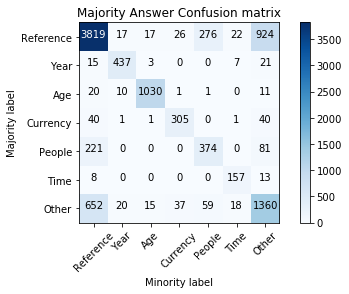

In [7]:
ind_dic = {1: 0, 2: 1, 3: 2, 4: 3, 7: 4, 8: 5, 5: 6, 6: 6}
def majority_agreement(answers):
    no_ag = Counter()
    distr = Counter(tuple(sorted(tuple([v[0] for v in c['ans']]), reverse=True)) for c in answers.values())
    conf_mat = np.zeros((7, 7))
    for trip, c in distr.most_common():
        x = Counter(trip)
        y = OrderedDict(x.most_common())
        if len(y) == len(trip):
            no_ag[tuple(x.keys())] += c
        elif len(y) == 1:
            i = j = y.items()[0][0]
        else:
            i = y.items()[0][0]
            j = y.items()[1][0]
        conf_mat[ind_dic[i]][ind_dic[j]] = c
#     print conf_mat
    plt.figure()
    class_names = ['Reference', 'Year', 'Age', 'Currency', 'People', 'Time', 'Other']
#     sns.heatmap(conf_mat, =class_names)
    plot_confusion_matrix(conf_mat.astype(int), classes=class_names,
                          title='Majority Answer Confusion matrix')
#     plt.savefig('../resources/conf-mat.svg', bbox_inches='tight', format='svg', dpi=1200)
    plt.savefig('../reports/figures/ans-agg.png', bbox_inches='tight', dpi=200)
    plt.show()
    return no_ag
    
no_ag = majority_agreement(answers_comb)

In [32]:
sum(no_ag.values())

115

In [33]:
115.0/10223

0.011249144086862957

In [28]:
len(answers_comb)

10223